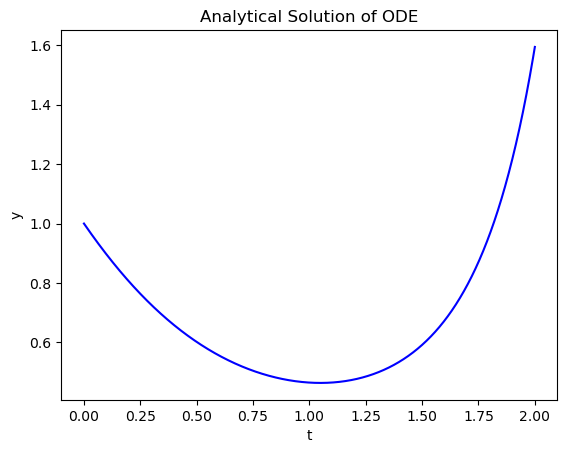

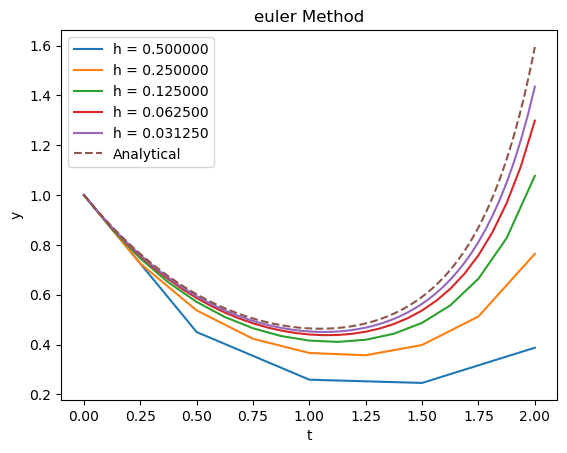

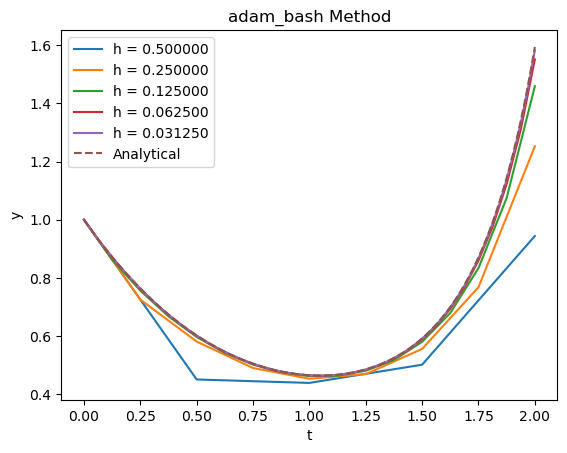

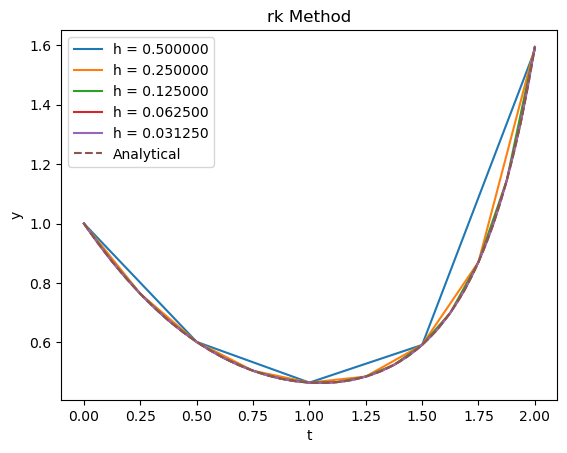

euler 
    stepsize  max_error  average_error
0  0.500000   1.207520       0.382114
1  0.250000   0.830561       0.199234
2  0.125000   0.517445       0.102322
3  0.062500   0.295943       0.051949
4  0.031250   0.159574       0.026188
adambash 
    stepsize  max_error  average_error
5  0.500000   0.650808       0.183881
6  0.250000   0.341904       0.064922
7  0.125000   0.135107       0.019539
8  0.062500   0.042900       0.005303
9  0.031250   0.012004       0.001368
RK4 
     stepsize     max_error  average_error
10  0.500000  1.021770e-02   2.100204e-03
11  0.250000  9.674210e-04   1.205044e-04
12  0.125000  7.273840e-05   6.130809e-06
13  0.062500  4.905530e-06   3.205939e-07
14  0.031250  3.165770e-07   1.788968e-08
slope for euler=
 0.9673404412792722
slope for adambash=
 1.775402354676909
slope for rk4=
 4.223620755602876


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def analytical_solution(t):
    y = np.exp((t**3)/3 - 1.1*t)
    return y

t_list = np.linspace(0, 2, 2000)
y_analytical = analytical_solution(t_list)

plt.figure()
plt.plot(t_list, y_analytical, c = 'blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Analytical Solution of ODE')
plt.show()


dt_list = np.array([0.5, 0.25, 0.125, 0.0625, 0.03125])
method = ['euler_', 'adam_bash_', 'rk_']
identifier = ['0.500000', '0.250000', '0.125000', '0.062500', '0.031250']

for i in method:
    plt.figure()
    for j in identifier:
        temp_csv = pd.read_csv(i + j + '.txt', sep = '\t')
        plt.plot(temp_csv.iloc[:, 0], temp_csv.iloc[:, 1], label = 'h = ' + j[0:])
        
        
    plt.plot(t_list, y_analytical,linestyle='dashed',label = 'Analytical')
    plt.title(i[:-1] + ' Method')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.show()

cols=["stepsize","max_error","average_error"]
df=[]
for i in method:
    for j in identifier:
        error_csv=pd.read_csv(i+j+'_error'+'.txt',sep='\t')
        max_all=(error_csv.iloc[:,1].max())
        mean_all=error_csv.iloc[:,1].mean()
        df.append({"stepsize":j,"max_error":max_all,"average_error":mean_all})
        df1=pd.DataFrame(df, columns=cols)
euler_error=df1.iloc[0:5]
adambash_error=df1.iloc[5:10]
rk4_error=df1.iloc[10:15]
  

print("euler \n",euler_error)
print("adambash \n",adambash_error)       
print("RK4 \n",rk4_error)
slope1, intercept = np.polyfit(np.log(dt_list), np.log(euler_error.iloc[:, 2]), 1)
print("slope for euler=\n",slope1 )
slope2, intercept = np.polyfit(np.log(dt_list), np.log(adambash_error.iloc[:, 2]), 1)
print("slope for adambash=\n",slope2 )
slope4, intercept = np.polyfit(np.log(dt_list), np.log(rk4_error.iloc[:, 2]), 1)
print("slope for rk4=\n",slope4 )


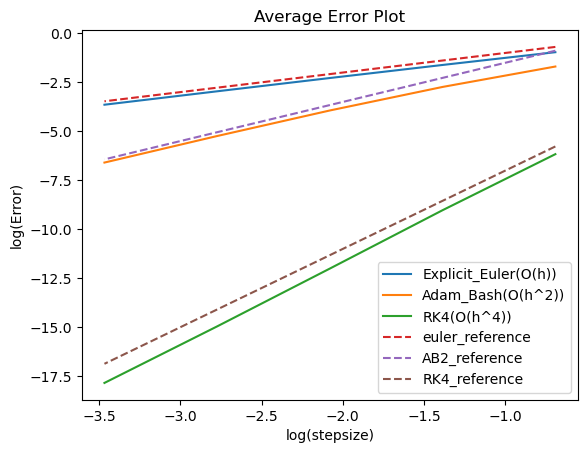

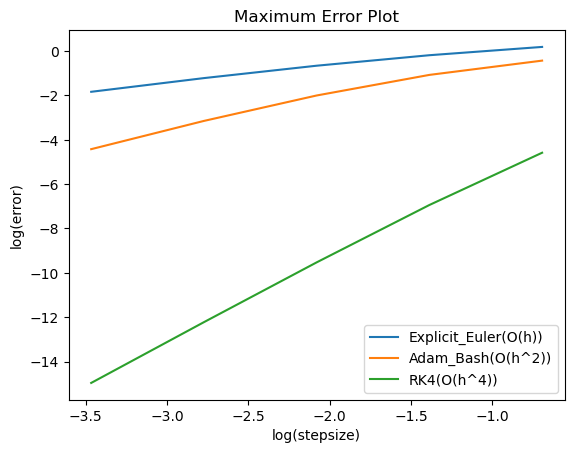

In [12]:

plt.figure()  
plt.plot(np.log(dt_list), np.log(euler_error.iloc[:, 2]), label = "Explicit_Euler(O(h))") 
plt.plot(np.log(dt_list), np.log(adambash_error.iloc[:, 2]), label = "Adam_Bash(O(h^2))")  
plt.plot(np.log(dt_list), np.log(rk4_error.iloc[:, 2]), label = "RK4(O(h^4))")
plt.plot(np.log(dt_list), 1*np.log(dt_list),linestyle='dashed', label = "euler_reference")
plt.plot(np.log(dt_list), 2*np.log(dt_list)+.5,linestyle='dashed',label = "AB2_reference")
plt.plot(np.log(dt_list), 4*np.log(dt_list)-3,linestyle='dashed',label = "RK4_reference")

plt.title('Average Error Plot')
plt.xlabel('log(stepsize)')
plt.ylabel('log(Error)')
plt.legend()
plt.show()


plt.figure()  
plt.plot(np.log(dt_list), np.log(euler_error.iloc[:, 1]), label = "Explicit_Euler(O(h))") 
plt.plot(np.log(dt_list), np.log(adambash_error.iloc[:, 1]), label = "Adam_Bash(O(h^2))")  
plt.plot(np.log(dt_list), np.log(rk4_error.iloc[:, 1]), label = "RK4(O(h^4))")  
plt.title('Maximum Error Plot')
plt.xlabel('log(stepsize)')
plt.ylabel('log(error)')
plt.legend()
plt.show()
